In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

In [9]:
def LikePoisson(lambda_, n):
    return ( np.exp(-lambda_)*lambda_**n )/math.factorial(n)

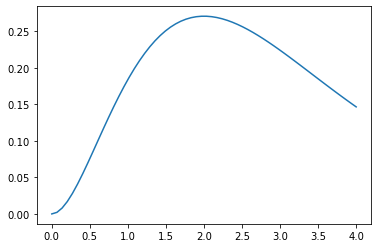

In [12]:
l = np.linspace(0.,4, 60)
likelihoodPois = LikePoisson(l,2)
plt.plot(l, likelihoodPois)
plt.show()

(array([1., 0., 0., 2., 0., 1., 3., 0., 1., 2.]),
 array([-5.84192597, -4.5755447 , -3.30916343, -2.04278216, -0.77640089,
         0.48998039,  1.75636166,  3.02274293,  4.2891242 ,  5.55550548,
         6.82188675]),
 <a list of 10 Patch objects>)

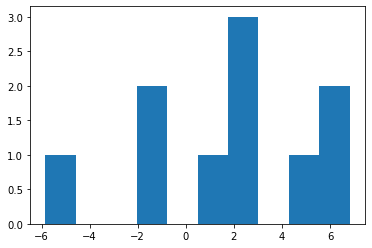

In [18]:
Data = np.loadtxt('dataMLikelihood.dat')
plt.hist(Data)

<b>Objetivo:</b>Encontrar el mejor valor de sigma dada la secuencia de datos observados $\{x_{k}\}$, y la incertidumbre asociada:
$$prob(\sigma | \{x_{k}\}) \propto prob(\sigma | \{x_{k}\})prob(\sigma)$$

Asumismos la probabilidad de $P(\sigma) = A$ para $1 < \sigma < 10$ y cero en otro caso.

In [19]:
def probabilidad(x, sigma):
    return (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-0.5*(x/sigma)**2)

In [20]:
def GetLikelihood(x, sigma):
    like = 1.0
    for i in x:
        like *= probabilidad(i, sigma)
    
    return like

In [21]:
sigmai, sigmaf, Npoints = 1., 10., 1000
sigma = np.linspace(sigmai, sigmaf, Npoints)
Likelihood = GetLikelihood(Data, sigma)

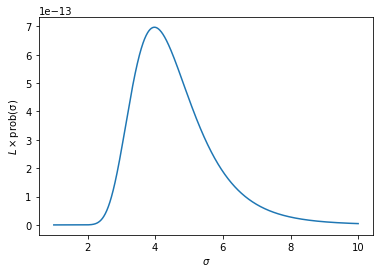

In [26]:
plt.figure()
plt.plot(sigma, Likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$L \times {\rm{prob}(\sigma)}$')
plt.show()

In [29]:
print(np.max(Likelihood))

6.967942130731746e-13


In [27]:
def GetDerivative(x, sigma):
    h = 0.000001
    d = (GetLikelihood(x, sigma + h) - GetLikelihood(x, sigma - h))/(2*h)
    return d

Text(0, 0.5, '$ dL/d\\sigma$')

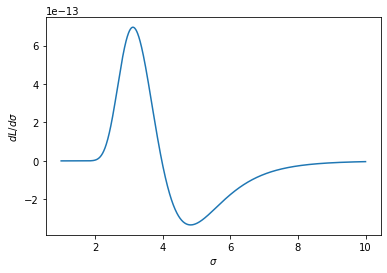

In [33]:
Dlikelihood = GetDerivative(Data, sigma)
plt.figure()
plt.plot(sigma, Dlikelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$ dL/d\sigma$')

In [34]:
def Get2Derivative(x, sigma):
    h = 0.00001
    d = (GetDerivative(x, sigma+h)-GetDerivative(x, sigma-h))/(2.*h)
    return d

In [35]:
D2likelihood = Get2Derivative(Data, sigma)

Text(0, 0.5, '$ d^{2}L/d\\sigma^{2}}$')

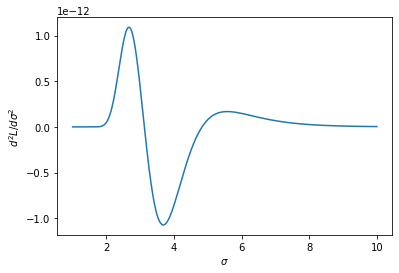

In [36]:
plt.figure()
plt.plot(sigma, D2likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$ d^{2}L/d\sigma^{2}}$')

El mejor valor de $\sigma$ dada la distribución de datos $\{x_{k}\}$, maximiza la función de Likelihood.$$ \frac{dL}{d\sigma}\bigg|_{\sigma_{0}} = 0  $$

In [39]:
def NewtonRaphson(x, sigmai):
    precision = 1e-20
    sigman = sigmai
    while np.abs( GetDerivative(x, sigman) ) > precision:
        sigman -= GetDerivative(x, sigman)/Get2Derivative(x, sigman)
    
    return sigman

In [40]:
SigmaValue = NewtonRaphson(Data, 4.0)
print(SigmaValue)

3.9760525027321862



Para encontrar el error en la estimación usamos el valor maximo en la segunda derivada. No obstante, el likelihood debe estar normalizado correctamente.

$$ \Delta \sigma_{0} = -\frac{d^{2}L}{d\sigma^{2}}\bigg|_{\sigma_{0}} $$

In [42]:
test = -Get2Derivative(Data, SigmaValue)
print(test)
#Muy pocos datos, y tan poco error?? --> No muy verosimil

8.815148273497542e-13


In [43]:
def IntegrateLikelihood(x, sigma_min, sigma_max):
    Npoints = 1000
    s = np.linspace(sigma_min, sigma_max, Npoints)
    Likelihood = GetLikelihood(x, s)
    h = s[1] - s[0]
    w = np.ones(Npoints)*h
    w[0] = 0.5*h
    w[-1] = 0.5*h
    
    integral = np.sum(Likelihood*w)
    return integral

In [44]:
Normalization = IntegrateLikelihood(Data, 1.0, 10.)
print(Normalization)

1.7051343479160216e-12


In [45]:
DeltaSigma = -Get2Derivative(Data, SigmaValue)/Normalization
print(DeltaSigma)

0.5169767581229728


$$ \hat{\theta} = 3.97 \pm 0.51 $$
Este error siempre es simétrico, porque suponemos que cerca del máximo, la distribución es Gaussiana.

In [47]:
#El error es simetrico, porque tenemos una parabola (ver notas de clase).
D2Likelihood = Get2Derivative(Data, sigma)/Normalization

Text(0, 0.5, '$d^{2}L\\d \\sigma^{2}$')

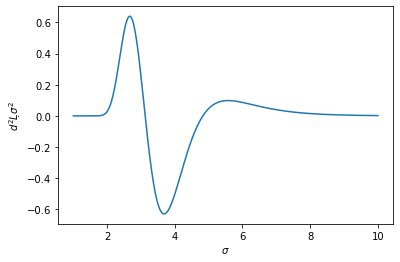

In [48]:
plt.figure()
plt.plot(sigma, D2Likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$d^{2}L\d \sigma^{2}$')